Fin'ora abbiamo lavorato con funzioni polinomiali dal toro piatto in $\mathbb{R}^2$ della forma $(x,y) \mapsto (f_1(x,y),f_2(x,y))$ con $f_i$ somme (finite) di monomi determinati da 5 parametri $r \in \mathbb{R}, \; a,b,c,d \in \mathbb{Z}^+ \colon f_i(x,y) = \sum_{\lambda \in \Lambda}r_\lambda sen(x)^{a_\lambda}cos(x)^{b_\lambda}sen(y)^{c_\lambda}cos(y)^{d_\lambda}$. Più parametri di shifting per evitare che i punti critici di $f_1, f_2$ coincidano.

Abbiamo lavorato con dei gradienti della libreria numdifftools di Python (in generale precisi ma lenti) e anche con dei gradienti fatti da noi (molto più veloci ma generano più noise). Abbiamo trovato che dipendendo della situazione sarà preferibile utilizzare uno oppure l'altro. In entrambi casi abbiamo utilizzato diversi parametri di precisione: uno che determina la quantità di punti che calcoliamo sul toro (le prove qua sono fate per 40000 punti, che abbiamo trovato ci dia un buon compromesso tra precisione e tempo di esecuzione) e degli altri che corrispondono alla «tolleranza» nel calcolo dei punti critici e pareto-critici. La situazione generale per funzioni di grado maggiore di 1 è che bisogna utilizzare delle tolleranze basse perchè entrambi gradienti trovano molto noise (punti finti che vengono fuori da aprossimazioni) prima di trovare punti che effettivamente appartengono all'extended Pareto grid. 

Pensiamo che una possibile soluzione per questo problema sia appliccare una procedura di antialiasing: grosso modo questo consisterebbe in estrarre dalla griglia di 40000 punti sul toro una matrice di 1 sui punti che si plottano e 0 sui punti che non si plottano, dividerla in blocchi e cancellare oppure ricalcollare con tolleranze più basse dei blocchi che corrispondano a noise (blocchi quasi totalmente pieni di 1). Questo però non abbiamo cominciato a programmarlo.

Abbiamo anche programato un metodo per leggere i polinomi da input scritto dall'utente che ci fa comodo a noi per fare le prove e servirebbe alla persona che voglia utilizzare questo per generare velocemente gli extended Pareto grid desiderate.

Adesso aggiungo alcune prove per illustrare i diversi metodi di cui ho appena parlato:

In [5]:
from ourPolynomial import *
from ProgrammaEPG import *


# Esempio in grado 1
$f = (cos(x)+cos(y),sen(x)+sen(y))$

$\nabla_{f_1} = (-sen(x),-sen(y)),\;\;\; \nabla_{f_2} = (cos(x), cos(y))$

In questo caso i punti critici di $f_1,f_2$ non coincidono.

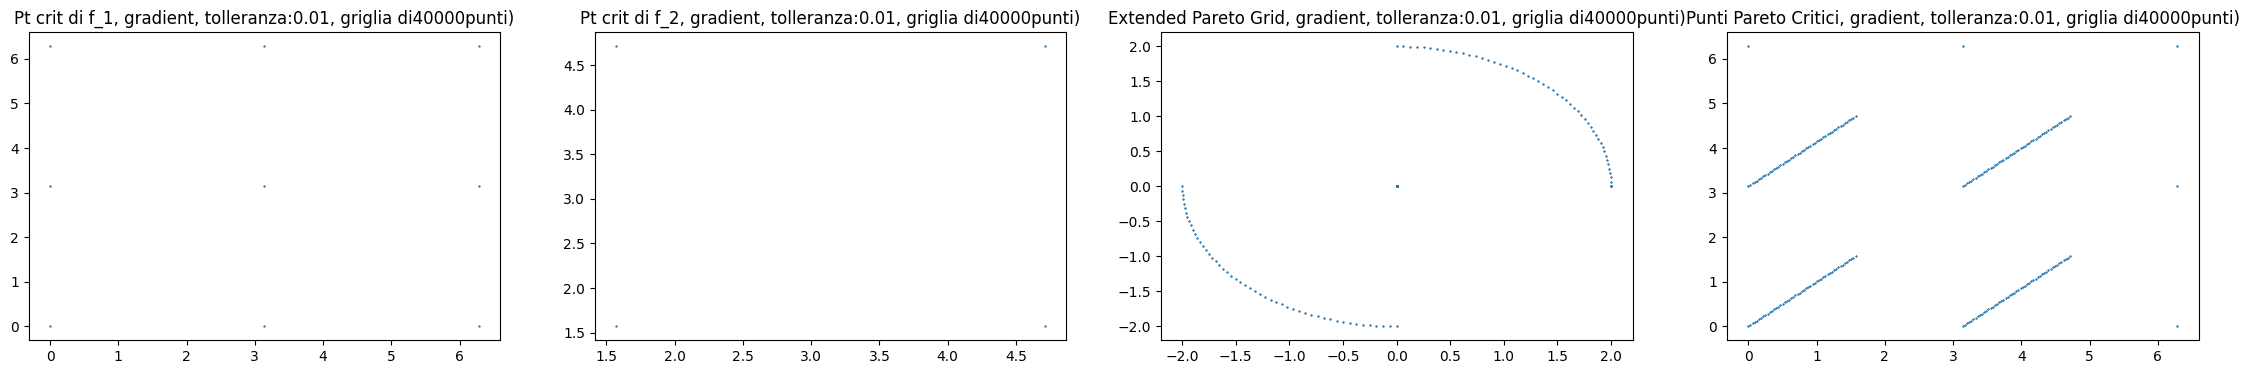

In [19]:
f1 = parse("cosx+cosy")
f2 = parse("senx+seny")
EPG(f1,f2,200,0.01,0.01,True)

In grado 1 possiamo utilizzare tolleranze molto basse per ottenere un risultato soddisfacente con i nostri gradienti. Il tempo di esecuzione per generare quelle 4 immagini è di 10.2 secondi. Adesso vediamo una prova con i gradienti di Python:

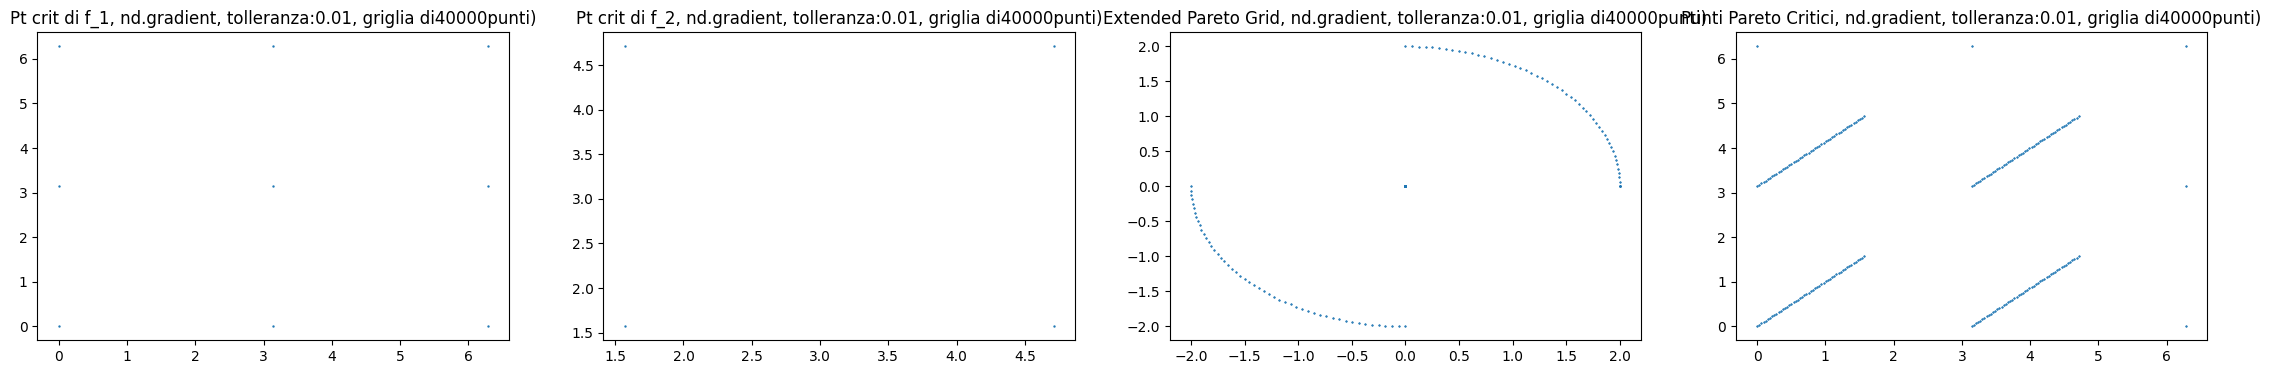

In [23]:
def f_1(x):
    return np.cos(x[0])+np.cos(x[1])

def f_2(x):
    return np.sin(x[0])+np.sin(x[1])

EPG(f_1,f_2,200,0.01,0.01,0)

Questo invece si ha preso l'indegnante quantità di tempo di 4 minuti e 55 secondi per plottare le stesse cose.

# Esempio in grado 2
$g = (cos(x)sen(y),sen(x)sen(y) + cos(y))$

$\nabla_{g_1} = (-sen(x)sen(y), cos(x)cos(y)),\;\;\; \nabla_{g_2} = (cos(x)sen(y), sen(y)cos(y)-sen(y))$

Di nuovo in questo caso i punti critici di $g_1,g_2$ non coincidono.

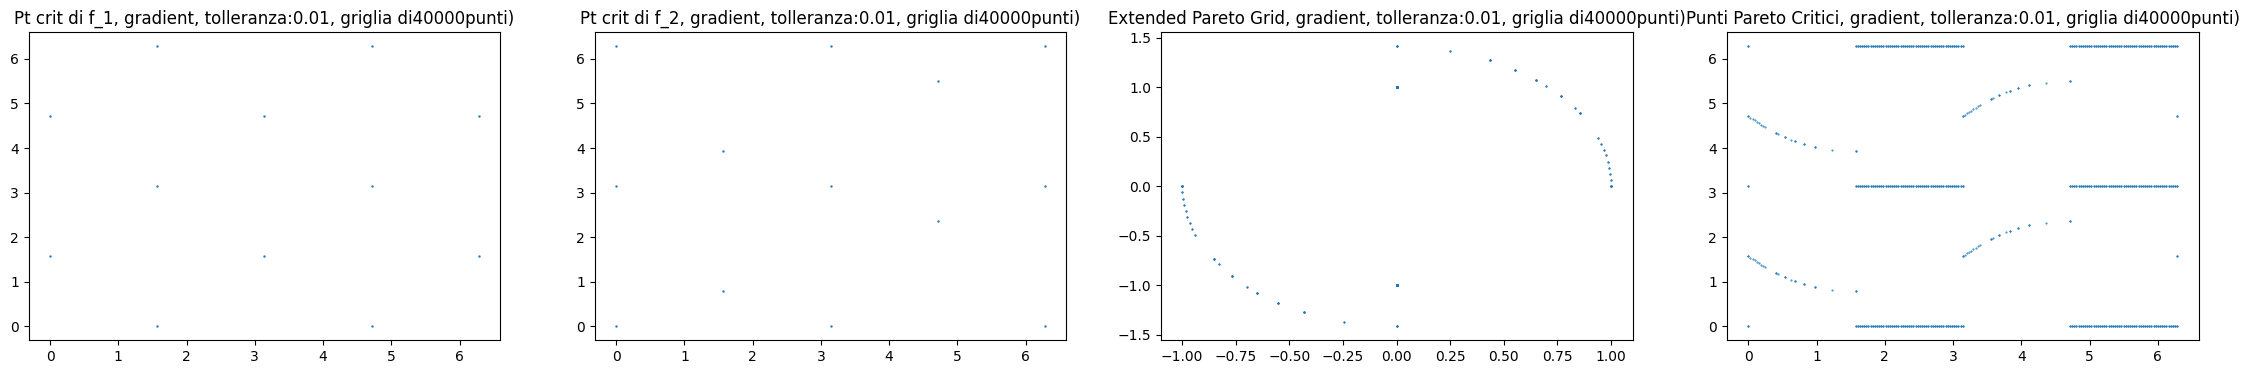

In [27]:
g1 = parse("cosxseny")
g2 = parse("senxseny + cosy")
EPG(g1,g2,200,0.01,0.01,True)

Utilizzando gli stessi parametri di tolleranza di prima i punti critici sono corretti però i contour vengono in modo meno chiaro rispetto di prima. Alzando la tolleranza per i punti pareto critici da 0.01 a 0.1 otteniamo un miglior risultato a cambio di un po' di noise. Queste prove si sono messe 9.9 e 9.5 secondi rispettivamente.

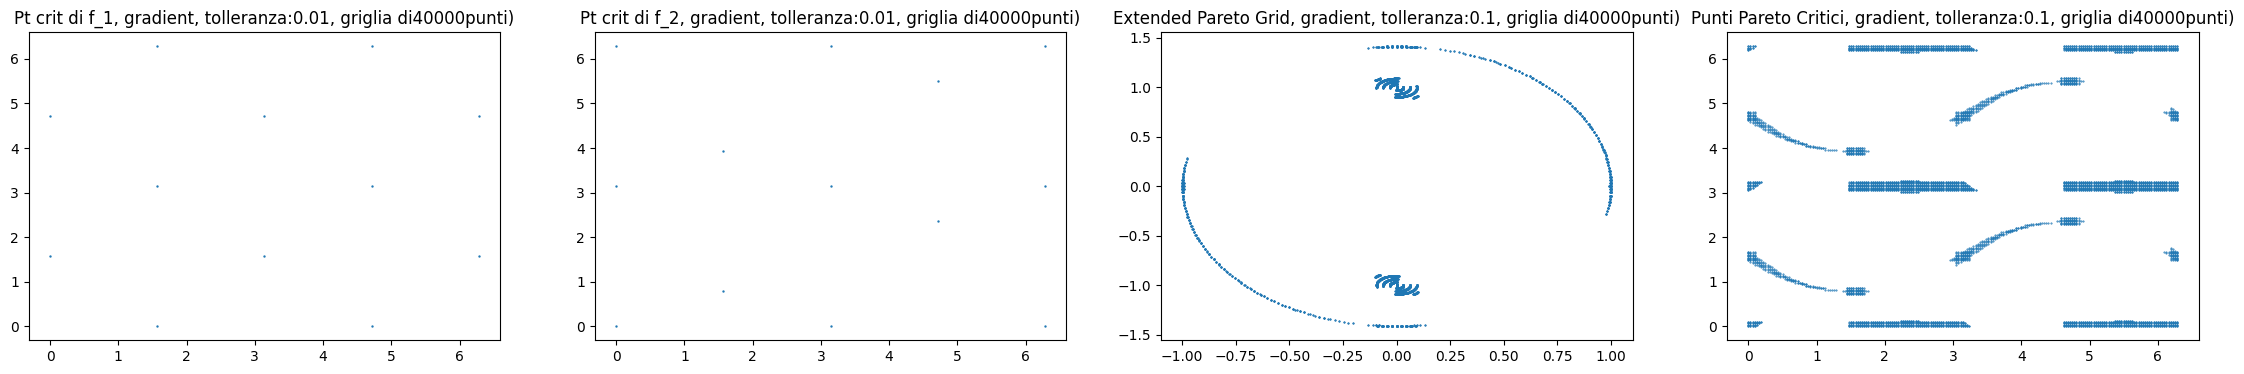

In [30]:
EPG(g1,g2,200,0.01,0.1,True)

A continuazioni ci sono le prove con i gradienti di Python con gli stessi valori di tolleranza. Non si vedono delle differenze e il tempo di esecuzione è di 5 minuti, circa.

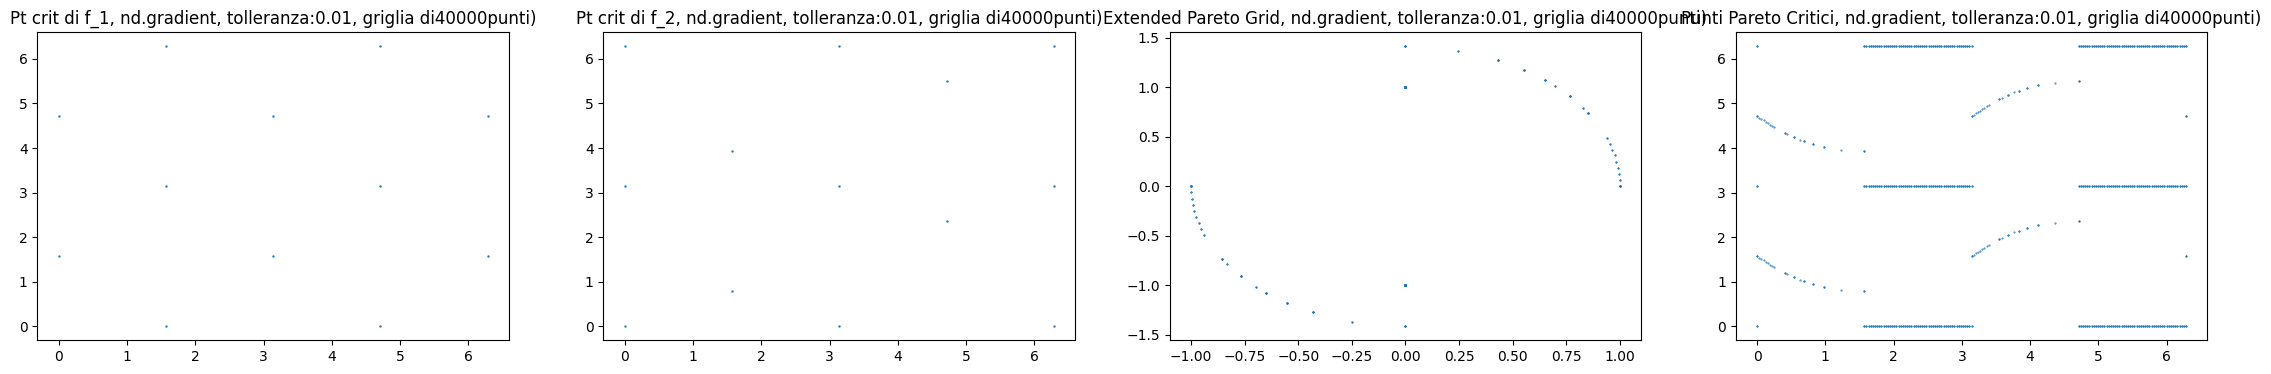

In [31]:
def g_1(x):
    return np.cos(x[0])*np.sin(x[1])

def g_2(x):
    return np.sin(x[0])*np.sin(x[1]) + np.cos(x[1])

EPG(g_1,g_2,200,0.01,0.01,0)

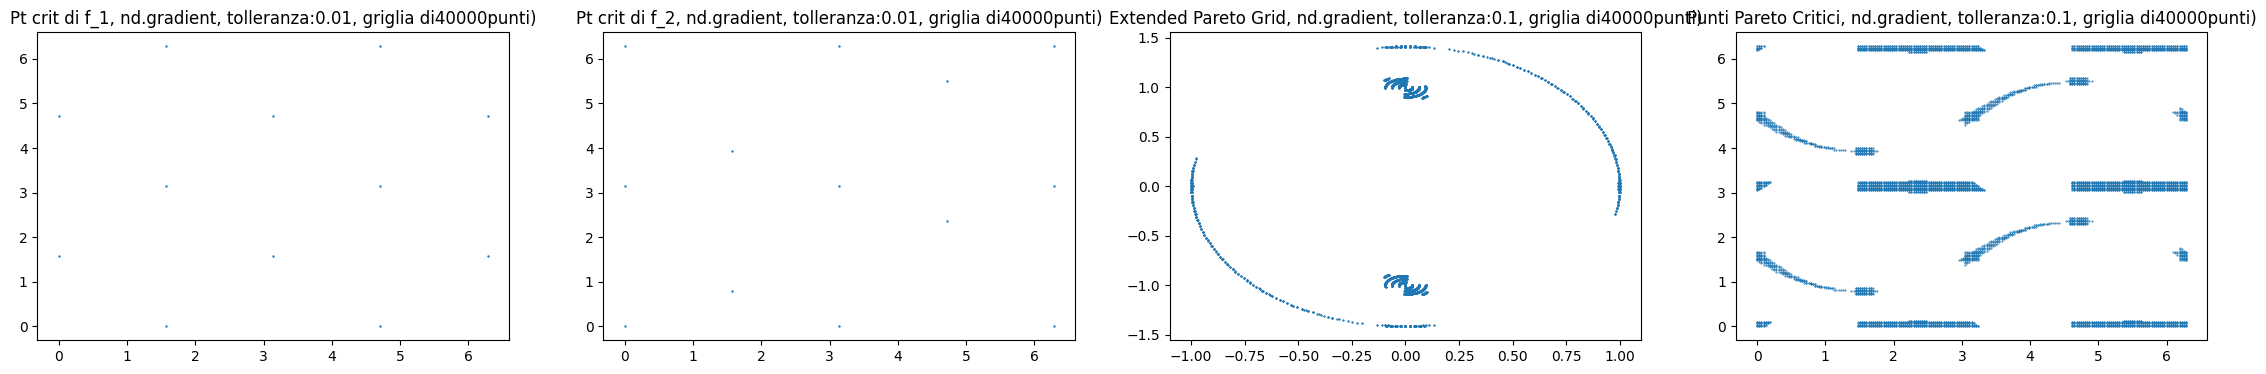

In [32]:
EPG(g_1,g_2,200,0.01,0.1,0)

# Esempio in grado 3

$h = (2cos(x)^2 + 4cos(y),sen(x)^3 + 3sen(y)^2)$

$\nabla_{h_1} = (-4cos(x)sen(x), -4sen(y)),\;\;\; \nabla_{h_2} = (3cos(x)sen(y)^2, 6sen(y)cos(y))$

Questa volta i punti $\{(u,v) \colon u,v \in \{0, \frac{\pi}{2}, \pi, \frac{3\pi}{2}\}\}$ sono critici per entrambi funzioni. Prima proviamo cosa viene fuori senza utilizzare dei shift per separare i punti critici.

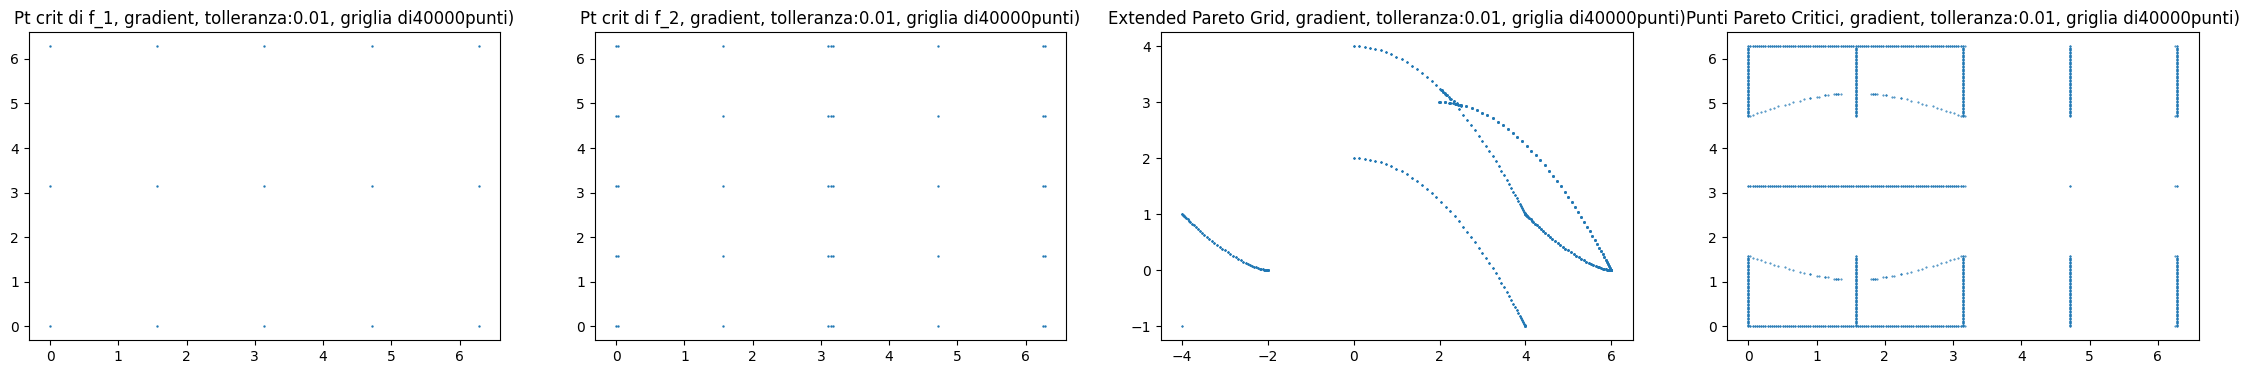

In [34]:
h1 = parse("2cos^2(x) + 4cos(y)")
h2 = parse("sen^3(x) + 3sen^2(y)")
EPG(h1,h2,200,0.01,0.01,True)

Qua cominciamo a avere degli errori significativi, perchè nell'extended Pareto grid ci mancano degli pezzi di contour. Questi riusciamo a vederli aumentando molto la tolleranza per i punti pareto critici, per esempio da 0.01 a 0.7. Però aggiungiamo tanto rumore, e neanche così si vede tutto il contour. I tempi per queste prove sono state 10.2 secondi e 13.6 rispettivamente.

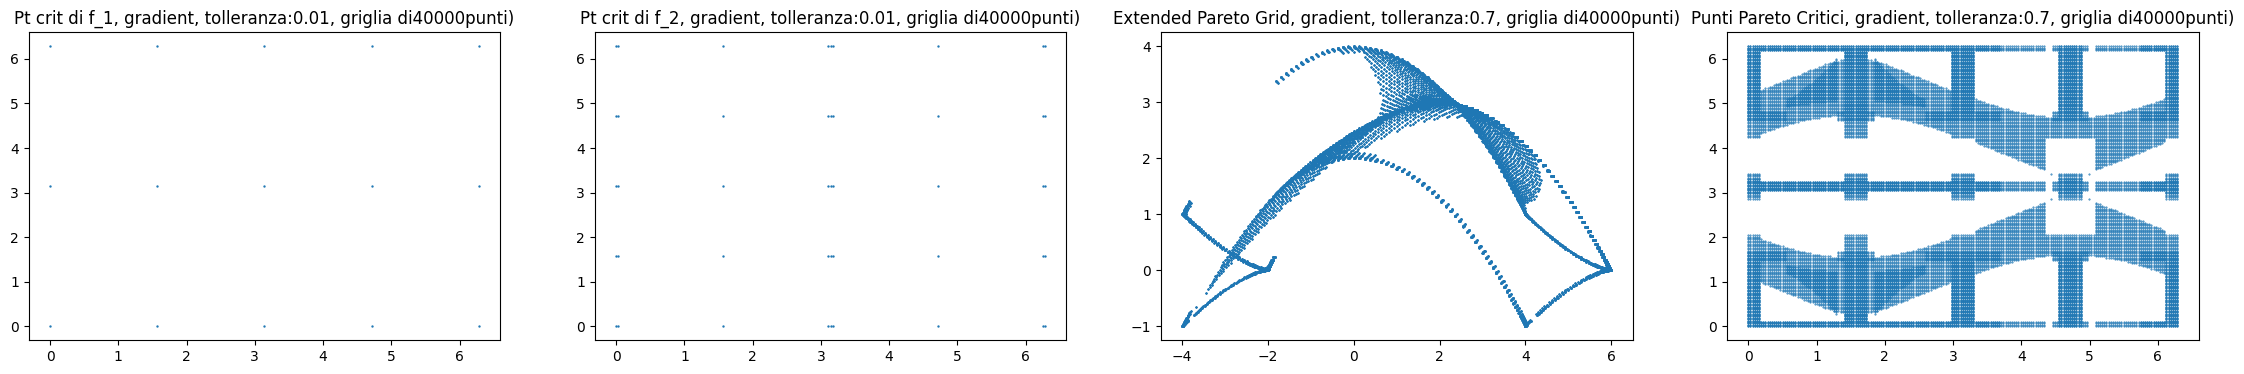

In [38]:
EPG(h1,h2,200,0.01,0.7,True)

Sempre con i gradienti fatti da noi e tolleranza 0.7, proviamo a mettere un shift su $f_1$ in modo di avere punti critici diversi per entrambi funzioni. Come prima, si riesce a vedere qualcosa ma c'è troppo rumore.

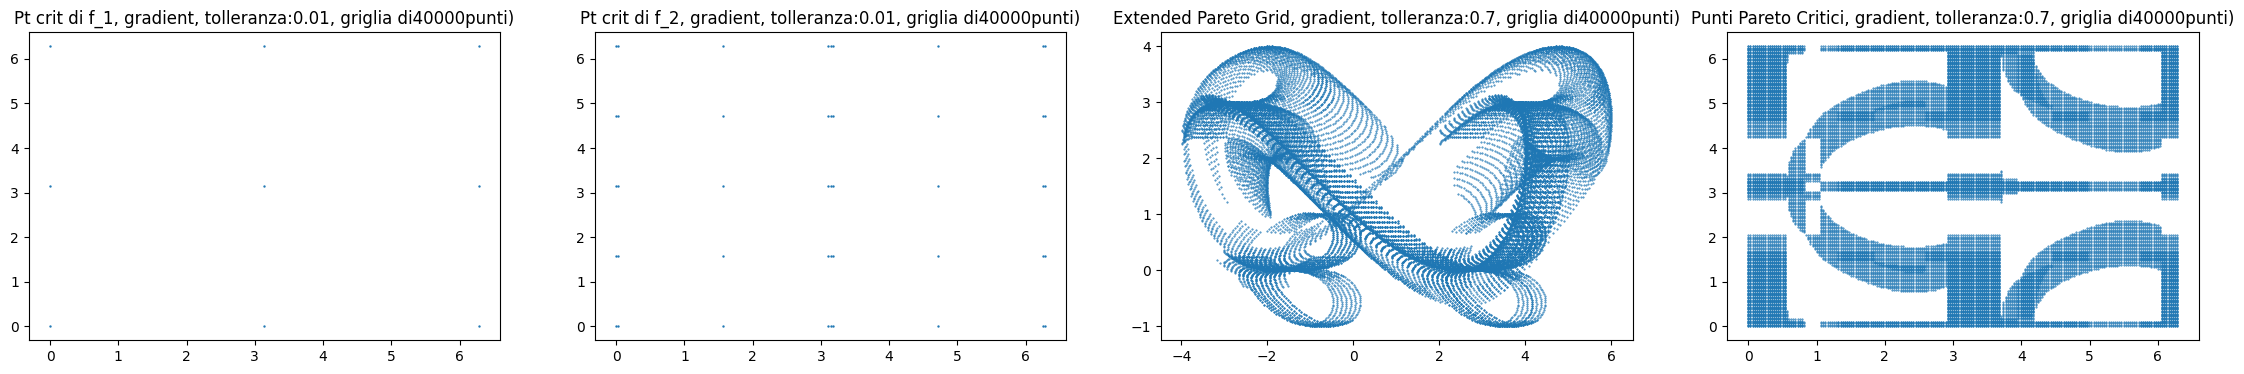

In [44]:
h1 = parse("2cos^2(x+1) + 4cos(y+1)")
h2 = parse("sen^3(x) + 3sen^2(y)")
EPG(h1,h2,200,0.01,0.7,True)

Adesso proviamo con i gradienti di Python. Come nei casi precedenti, non si aprezzano differenze e il tempo di esecuzione è di 4 minuti e 46 secondi.

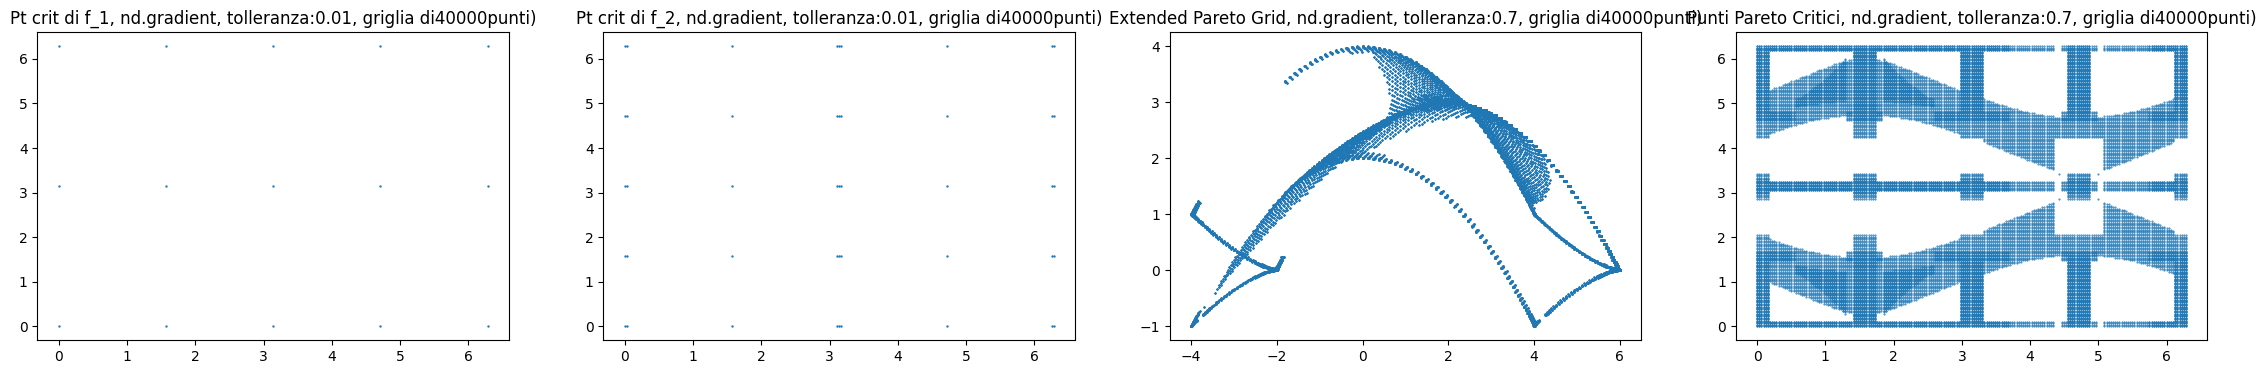

In [48]:
def h_1(x):
    return 2*np.cos(x[0])**2 + 4*np.cos(x[1])

def h_2(x):
    return np.sin(x[0])**3+3*np.sin(x[1])**2

EPG(h_1,h_2,200,0.01,0.7,0)

# Esempio in cui diferiscono i due metodi

Per finire vediamo un'esempio nel cui abbiamo ottenuto risoltati significativamente diversi per i due metodi.

$\varphi = (2cos^2(x+5)+4cos(y-1), sen^3(x)+3sen^2(y))$

$\nabla_{\varphi_1} = (-4sen(x+5)cos(x+5), -4sen(y-1)),\;\;\; \nabla_{\varphi_2} = (3sen(x)^2 cos(x), 6sen(y)cos(y))$



In [1]:
phi1=parse('2cos^2(x+5)+4cos(y-1)')
phi2=parse('sen^3(x)+3sen^2(y)')
EPG(phi1,phi2,200,0.001,0.5,True)

NameError: name 'parse' is not defined

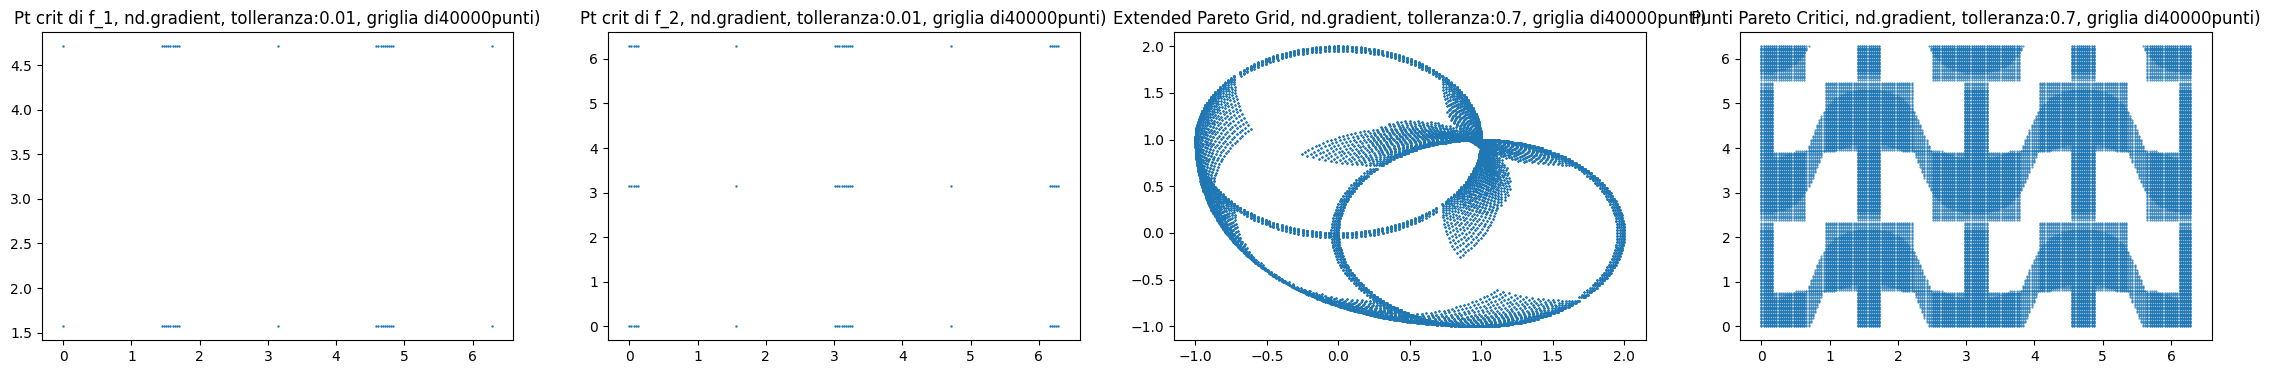

In [51]:
def phi_1(x):
    return 2*np.cos(x[0]+5)**2+4*np.cos(x[1]-1)

def phi_2(x):
    return 1*np.sin(x[0])**3+3*np.sin(x[1])**2

EPG(phi_1,phi_2,200,0.01,0.5,0)

In questo ultimo caso, con gli stessi parametri di tolleranza si osserva più informazione con il metodo più lento.